# Citi Bike Distribution in New York City 

<img src="../images/dd.png" width="400" height="60"></img>

<em>Image from Masih A. Babagoli, Tanya K. Kaufman, Philip Noyes, Perry E. Sheffield,
Exploring the health and spatial equity implications of the New York City Bike share system,
Journal of Transport & Health </em>

This project aims to answer the question **How well does Citi Bike represent NYC demographics? (in 2017)**. 

#### Team Members 
- Seonghee Lee (sl994) 
- Nicholas Rahardja (nmr73)
- Chelsea Choi (cc2583)

#### Team Github
- https://github.com/shljessie/citibike-nyc

#### Team Raw Data Google Drive 
- https://drive.google.com/drive/folders/197_d1BwPHXmVuyKA6I7UEyEw4Nqo8dAk 

#### Team Final Data Google Drive 
- https://drive.google.com/drive/folders/1glgD5ly1ABej2GDXzc-iUMjpu4HkItwa?usp=sharing
<br/> 

_______________


## Contents of this Notebook

1. Introduction
2. Data Description 
3. Pre Registration Statement 
4. Data Analysis 
5. Evaluation of Significance 
6. Interpretation and Conclusion
7. Limitations 
8. Source Code
9. Acknowledgement 
10. Appendix 
<br/> 

_______________

# 1. Introduction

1. Context of Work
2. Research Question
3. Main Findings
4. Summary of Results


#### 1. Context of Work & Project Design

Starting with Tulsa, Oklahoma’s program that launched in 2007, more than 60 U.S. cities now have bike-share systems. **However, whether or not these bike sharing systems are truly accessible for all demographics is questionable.** For example, a [study done by Portland State University](https://trec.pdx.edu/research/project/884) finds that significant portions of the population are underrepresented among bike share users, including people of color, lower-income, and less-educated groups. An [article in 2017](https://usa.streetsblog.org/2017/07/05/whats-keeping-people-from-using-bike-share-new-study-breaks-it-down-by-race-and-income/) finds that low-income communities and people of color view traffic risk, high prices, and the potential for crime and harassment as the biggest barriers to bicycling and using bike-share in their neighborhoods. Also studied a [data visualization research at MIT](https://aberke.github.io/income-race-bikes/)that shows how bikes are being distributed in NYC throughout the years in accordance to race&income.

In this project, we look at **how fairness of bike sharing systems applies to New York City's Citi Bike.** We have chosen to focus our analysis to New York City and Citi Bike, since New York City is one of the most diverse cities in the world, and Citi Bike is the predominant bike share system used in NYC. More specifically, **we will look into how Citi Bike stations are distributed in NYC** and how this relates to the following factors: 1) Citi Bike Usage 2) Race & Income.
Lastly, after gaining insight into the factors which influence how Citi Bike stations are distributed in NYC, we will attempt to provide recomendations for ways in which Citi Bike can improve their distribution of stations to ensure 
that the placements of stations matches demand and that all demographics are fairly represented. 

#### 2. Research Question

How is Citi Bike representing NYC demographics? (in 2017).

Here **NYC demographics** will refer to the **usages of Citi Bike trips** and **Race&Income of NYC**

On the other hand, **Citi Bike representation** will refer to the the distribution of stations.

#### 3. Limitations 

We are specificially looking at **NYC Citi Bike trip data in 2017 as a sample** of the representation of NYC bike stations around New York. We chose New York City's Citi Bike system since New York City is an area where there are widely varying levels of income. 
We chose 2017 for two reasons, 1) NYC's race and income data was available for the years 2013 -2018 and 2) 2017 was a year when many new stations of Citi Bike where added to represent its overall usage.
We decided that 2017 would be a fair representation of how Citi Bike stations were distributed throughout NYC.

We chose **geoid as our standard for breaking up NYC into different geographical areas**, since a geoid is the unique indentifier for a census tract, and a census tract is the smallest geographic region which the US goverment collects race and income data on during its annual Census. A census tract is roughly equivalent to a neighborhood, and they generally encompass a population between 2500 to 8000 people. 
<a href="https://popfactfinder.planning.nyc.gov/#11.77/40.7438/-73.99">This link </a> has more information on geoids and the visual size of them on a map.
Additional limitations are mentioned in 7) Limitations.

#### 4. Main Findings (todo)

> Intuitively, one might think that demand would be the strongest factor that influenced the placement of Citi bike stations. However, through linear regression, we found that the relationship between trips and stations is moderate and other factors influence the placement of stations. Additionally, we found that location plays an important role in the placement of stations.

> We found that race and income plays a significant role in determining the number of Citi Bike stations placed in a census tract. More specifically, we found that more stations are generally placed in Whiter and higher income census tracts. We also found that stations in Asian census tracts are utilized the most, whereas stations in Black census tracts are utilized the leasts. 

> We also found that the current distribution of Citi Bike stations under represents Asian census tract and that Citi Bike is not actively trying to solve this issue.  

#### 5. Summary of Results (todo)
- We found that census tracts with a high number of stations actually had a lower number of trips. 
- We found that white and high income areas had a high number of stations
- We found that white areas have a high number of stations to meet demand
- We found that asian census tracts do not have enough stations to meet their current demand.
<br/> 

_______________

In [3]:
#importing libaries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import DataFrame
import folium
from folium import plugins
from folium.plugins import HeatMap

# 2. Data Description 

For this project we used 3 different data sets. 
1. Citi Bike Trip Data
2. Citi Bike Station Data
3. NYC Race and Income Data

The data cleaning process of for these datasets are <a href="https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning">linked here</a>

### Dataset 1: Citi Bike Trip Data

In [4]:
trips_df = pd.read_csv('../data/citibike_trip_final.csv')
print('Number of Rows: {}'.format(trips_df.shape[0]))
print('Number of Columns: {}'.format(trips_df.shape[1]))
trips_df.head()

Number of Rows: 14049057
Number of Columns: 9


,start_time,stop_time,start_station_name,end_station_name,birth_year,gender,start_station_geoid,end_station_geoid,trip_minutes
0,2017-01-01 00:00:21,2017-01-01 00:11:41,W 82 St & Central Park West,Central Park West & W 72 St,1965.0,2,3.606102e+10,3.606101e+10,11
1,2017-01-01 00:00:45,2017-01-01 00:22:08,Cooper Square & E 7 St,Broadway & W 32 St,1987.0,2,3.606100e+10,3.606101e+10,21
2,2017-01-01 00:05:00,2017-01-01 00:14:20,Broadway & W 60 St,9 Ave & W 45 St,1973.0,1,3.606101e+10,3.606101e+10,9
3,2017-01-01 00:05:37,2017-01-01 00:19:24,Broadway & W 37 St,E 10 St & Avenue A,1977.0,2,3.606101e+10,3.606100e+10,13
4,2017-01-01 00:05:47,2017-01-01 00:10:02,York St & Jay St,Carlton Ave & Flushing Ave,1989.0,1,3.604700e+10,3.604702e+10,4


##### 1. What are the observations (rows) and the attributes (columns)?
Each observation in this data set corresponds to a trip taken on Citi Bike in 2017. The following are the features that are recorded for each trip: 
- start_time: Datetime object for the start time and date of the trip
- stop_time: Datetime object for the end time and date of the trip
- start_station_name: Name of starting station of the trip, a string
- end_station_name: Name of ending station of the trip, a string
- birth_year: Year user was born, an integer
- gender: (Zero=unknown; 1=male; 2=female)
- trip_minutes: Duration of the trip in minutes, an integer
- start_station_geoid: Unique identifier for the census tract that the trip started in, an integer
- end_station_geoid: Unique identifier for the census tract that the trip ended in, an integer. 

##### 2. Why was this dataset created?

It is open to the public to help people find insights about this system. Insights from these findings would help Citi Bike officials in the process of expanding citibike station placement. 

##### 3. Who funded the creation of the dataset?

This Citi Bike data was funded by Citi Bike in New York. Lyft is the operator of the Citi Bike program in New York City and Jersey City. The raw dataset was collected from this [source](https://www.citibikenyc.com/system-data)

##### 4.What processes might have influenced what data was observed and recorded and what was not?

Trips that may have been taken by staff who are managing Citi Bike throughout the city are not good representations of Citi Bikes trips by users only. Bikes may have been relocated overnight so that the distribution of bikes around the city are evenly distributed. Also bikes that may have been broken may lead to a loss of data.  Also Citi Bike usage trip data is not a complete representation of all bike rider data in New York. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

We dropped columns that we would not be using in our analysis, and also removed rows that had NaN values in them. Furthermore, we chose to only consider trips taken by users who are Citi Bike subscribers, to analyze the usual users of Citi Bike excluding tourists (one-time users). More than 90% of the original trips were taken by subscribers, so removing trips taken by non-subscribers. We have also dropped trips that were over 3 hours. The reason for this is because we wanted to be looking at regular users of Citi Bike. If you keep a bike out for longer than 30 minutes at a time, regardless of the type, it's [$0.18 per minute](https://www.citibikenyc.com/pricing/single-ride). Using Citi Bike for unreasonably long hours of time even if you are a subscriber would be unreasonable since you are being charged. For this analysis we decided to set 3 hours as the limit to a reasonable amount of time,  a person who regularly uses a Citi Bike would ride.  The original table has spaces in its column names, so we decided to change these with underscores to make the more friendly for computation. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

In signing up for using Citi Bike, these users are allowing for Citi Bike to take data of their usage. 
Citi Bike releases information about the user’s ride and trip duration  including their start station, usertype(Subscriber, one time user), gender, and year of birth. Citi Bike plans on using this data to understand citi bike users and the overall trend of citi bike users in new york city. Though many Citi Bike users might not have been aware of this, they could have assumed that the data was collected to understand the Citi Bike users for business related reasons.

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/drive/folders/11YUr4yiiFKCNlN2MnGPGpCeXyrq92A0Z?usp=sharing



### Dataset 2 : Citi Bike Stations Data

In [5]:
stations_df = pd.read_csv('../data/citibike_stations_final.csv')
print('Number of Rows: {}'.format(stations_df.shape[0]))
print('Number of Columns: {}'.format(stations_df.shape[1]))
stations_df.head()

Number of Rows: 839
Number of Columns: 10


,station_id,station_name,lat,lon,first_trip,last_trip,geoid,trips_starting_here_2017,trips_ending_here_2017,total_trips_2017
0,254.0,W 11 St & 6 Ave,40.735324,-73.998004,2013-06-01,2019-07-31,36061006300,141183,143935,285118
1,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,2013-06-01,2019-07-31,36061006300,141183,143935,285118
2,253.0,W 13 St & 5 Ave,40.735439,-73.994539,2013-06-01,2018-10-31,36061006300,141183,143935,285118
3,345.0,W 13 St & 6 Ave,40.736494,-73.997044,2013-06-01,2018-10-31,36061006300,141183,143935,285118
4,151.0,Cleveland Pl & Spring St,40.721816,-73.997203,2013-06-01,2019-07-31,36061004100,121704,118537,240241


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a unique Citi Bike station in NYC. The following are the features for each station that is collected in this dataset: 

- station_id: Unique identifier for a station, an integer
- station_name: Name of the station, a string 
- lat: Latitude of the station, a float
- lon: Longitude of the station, a float 
- first_trip: Date of the first trip ever taken from the station, DateTime object 
- last_trip: Date of the last trip taken from the station (at the time this data set was downloaded), DateTime object
- geoid: Unique identifier for the NYC census tract that the station is located in, an integer 
- trips_starting_here_2017: number of trips taken from this station in 2017, an integer 
- trips_ending_here_2017: number of trips ending at this station in 2017, an integer
- total_trips_2017: total number of trips taken to and from this station in 2017, an integer

##### 2. Why was this dataset created?

The base dataset for this table came from the same source as the Citbike trip data set described above. However, more processing was done to this data to obtain this station dataset by a team of MIT researchers who were trying to map out the locations of Citi Bike stations in NYC for their research purposes. 

##### 3. Who funded the creation of the dataset?

This table uses as its base table the Cibike trip data set that was funded by Citi Bike in New York. However, the processing that was done to this raw citi bike data was done by MIT researchers, so it can be assumed that MIT indirectly funded the creation of this Citi Bike trip data set. [MIT Media Lab research](https://github.com/aberke/income-race-bikes/tree/master/data/nyc-bike)


##### 4.What processes might have influenced what data was observed and recorded and what was not?

A small number of stations are located on the boundary between two census tracts, in which case we decided to select the first census tract returned by the API. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using? (Link API?)

The original Citi Bike station data, was already well formatted, but did not include the geoid which we needed to identify. To obtain this geoid for each station, we used an API to obtain the geoid corresponding to the census tract that the station is located in. Next since our project focuses on 2017, we removed all stations that had its first trip after 2017 since this means that these stations were made after 2017, and thus are not relevant to our analysis. Furthermore, the original dataset had the number of trips from each station calculated up to 2019, thus we removed this column and used the trip dataset to calculate the number of trips taken to and from each station in 2017. We also renamed a few columns to make their names more intuitive such as renaming ‘id’ to ‘station_id’ and ‘name’ to ‘station_name’. 
Currently this station dataset doesn't exclude stations that are located in parks. But when we use this data alongside the race/income data of NYC the geoids of the parks (so the stations that are located in parks)are naturally removed because the census data of race/income does not look at a census of a park. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

(Same as trip data above) In signing up for using Citi Bike, these users are allowing for Citi Bike to take data of their usage. They could have assumed that the data was collected to understand the Citi Bike users for business related reasons.

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/file/d/1pATvzg-PTpPvs_8x5pKIs_jqlbKrWyat/view?usp=sharing


### Dataset 3 : NYC Race and Income Data in 2017

In [6]:
race_income_df = pd.read_csv('../data/race_and_income_final.csv')
print('Number of Rows: {}'.format(race_income_df.shape[0]))
print('Number of Columns: {}'.format(race_income_df.shape[1]))
race_income_df.head()

Number of Rows: 4775
Number of Columns: 10


,geoid,2017_median_income,2017_population,2017_white_population,2017_black_population,2017_asian_population,2017_other_population,2017_2_or_more_races,cent_lon,cent_lat
0,36001000100,27250,1939,502,1142,16,112,167,-73.736313,42.668922
1,36001000200,24091,4731,710,3474,104,32,411,-73.751504,42.664413
2,36001000300,33454,5558,2589,1539,559,291,580,-73.782679,42.680905
3,36001000401,74255,2459,2183,131,92,28,25,-73.864883,42.706315
4,36001000403,70815,4695,3256,714,416,79,230,-73.805276,42.676872


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a different census tract in NYC. A census tract is the smallest geographical area, defined by the US goverment, which census data is collected on. For each census tract the following are the attributes in the dataset. 

- geoid: Unique identifier for the census tract that the station is located in, an integer 
- 2017_median_income: Median income (dollars) in the census tract in 2017, an integer
- 2017_population: Total population in the census tract in 2017, an integer
- 2017_white_population: Total number of White individuals in the census tract, an integer
- 2017_black_population: Total number of Black individuals in the census tract, an integer
- 2017_asian_population: Total number of Asian individuals in the census tract, an integer
- 2017_2_or_more_races : Total number of individuals who identify as two or more races in the census tract, an integer
- cent_lon : Central longitude of census tract, a float 
- cent)lat : Central latitdue of census tract, a float 

##### 2. Why was this dataset created?

This dataset was created in order to study the census tract data along with the associated race and income in that tract from 2017. This was done by extracting the household median income and household race from the American Community Survey. 

##### 3. Who funded the creation of the dataset?

This data was created and funded by the [United States Census bureau ACS](https://data.census.gov/cedsci/). The creation of this dataset was by the [MIT Media Lab](https://github.com/aberke/income-race-bikes/blob/master/data/ny/race_and_income_data.csv)

##### 4. What processes might have influenced what data was observed and recorded and what was not?

The American Community Survey’s data collection process is performed by randomly selecting 3.5 million addresses to reply to the survey in order to represent the entire population. Because this survey is limited to those with addresses, there may be households and individuals who are not recorded in the census. For example, the homeless population is difficult to track and therefore could influence the data as well. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?
Because the original data from the American Community Survey was downloaded as a shapefile, the data had to be extracted and transformed into a dataframe. After extracting the race, income, and renaming the columns, the data set was created. 

Next, we dropped rows where the median income was missing or had NaN values. Furthermore for census tracts that had median income values of '$250,000+' we changed the median income value to '250,000' so that they can be treated as a numeric value. Laslty, we only kept the race and income data for 2017 and dropped all the other columns which correspond to the other years. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
The individuals contacted were aware of the data collection. In the constitution, it states that a census must be taken every 10 years. People likely understand the main purpose of the census as determining where federal and state funding should be spent. Moreover, their data is protected from being shared and used by any other government agency. 

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
https://drive.google.com/file/d/1obfrrDul07XDXEvyK6kf-N66_2K5-g88/view?usp=sharing
<br> 

_________

# 3. Preregistration Statement 

#### Analysis 1: What is the relationship between Citi Bike trips and number of stations in a census tract?

>Here we will check through graphs to explore what the relationship between trips and stations look like and confirm the relationship/absence of a relationship through **Linear Regression** and statistical findings.
Additionally we will be looking more closely at geoids with many stations but low amount of trips to see what may have caused an increased amount of stations in those areas.

       
#### Analysis 2: What is the relationship between station placements and the race & income demographic of the census tract? 

>To further our understanding of whether Citi Bike stations are fairly distributed, we will look into whether the placement of Citi Bike stations are influenced by the race and income demographics of a census tract. We will use Logistic Regression to confirm/deny the presence and strenght of this relationship. 

# 4. Data Analysis 

## Analysis 1: What is the Relationship between Citi Bike Trips and Number of Stations in a Census Tract?

### Trips vs Number of Stations in a Census Tract
We first want to look into whether Citi Bike stations are mainly distributed based on demand. To do this we start off by looking into the relationship between the number of Citi Bike trips taken from a census tract and the number of stations in the census tract. 

#### Trips and Stations by Geoid

Here we have grouped the number of stations & the number of trips by geoid. We will first plot a scatterplot based on this.
[A geoid](https://popfactfinder.planning.nyc.gov/#11.77/40.7438/-73.99) is a geographic region of NYC.

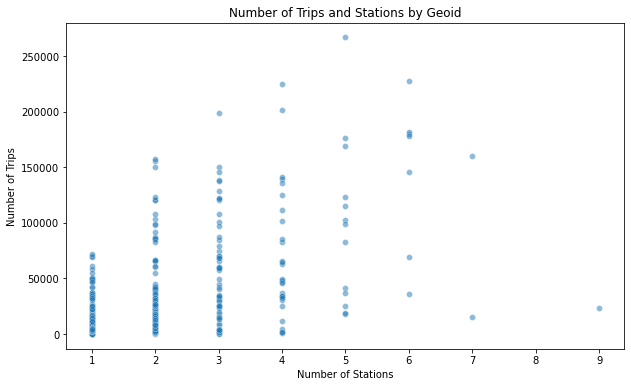

In [8]:
#group by geoid and count number of stations
stations_geoid = stations_df.groupby(['geoid']).size().reset_index(name = 'Number of Stations')
stations_geoid = stations_geoid.sort_values('Number of Stations', ascending=False)

#remove park geoids, as these census tracts do not have any race and income informaion
geoids_remove=['36061014300','36047017700','36061000500','36081009900','36061031703','36047001800','36081003700']
stations_geoid = stations_geoid[~stations_geoid['geoid'].isin(geoids_remove)]

## Number of Start Stations at each geoid
trips_start_df = trips_df.groupby(['start_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_start_df = trips_start_df.sort_values('Number of Trips', ascending=False)
trips_start_df = trips_start_df.rename(columns={'start_station_geoid': 'geoid'})
trips_start_df= pd.merge(stations_geoid,trips_start_df,  on=['geoid'], how='inner')

fig, (ax1) = plt.subplots(figsize=(10,6))

## Start Stations
sns.scatterplot(y="Number of Trips", x="Number of Stations", data=trips_start_df,ax=ax1, alpha=0.5)
ax1.set_title("Number of Trips and Stations by Geoid")
ax1.set_xlabel("Number of Stations")
ax1.set_ylabel("Number of Trips")
plt.show()

Each of the points in the scatterplot refers to a unique geoid in New York City, and the scatter plot shows the number of stations in that census tract and the number of trips taken from that census tract. 

Looking at the scatterplot, for census tracts with the number of stations ranging from one to five, as the number of stations increases, the variability and range in the number of trips taken from the census tract also increases. However, as we look at the census tracts with 6, 7, and 9 stations we can see that some of these census tracts, despite having an above average number of stations have a very low number of trips. For example, for the geoid with 9 stations, it only has below 50000 trips, which is a comparatively small amount of trips. Other geoids with only 1 and 2 stations also have a similar or even much higher amount of usage. For geoids with 5, 6, and 7 stations, although some of these geoids have a large number of trips, others have a very small number of trips, indicating that there might be an over supply of stations in these geoids. Overall, there seems to be a weak positive linear relationship between stations and trips.

Though we can observe an overall positive relationship between stations and trips, from the scatterplot we see that census tracts with more stations do not necessarily have more trips. There is great variability in the number of trips between geoids with the same amount of stations. This means that there must be other factors which influence the number of stations placed in each census tract such as race, income and location. 

Thus, in the next step we will take a closer look at the location of census tracts with an above average number of stations, specifically census tracts with 6, 7, and 9 stations. We want to know what may be influencing the placement of stations in these geoids and what caused them to have comparatively more stations. We have decided to first take a closer look at where these census tracts are located, since other than race and income, one factor that we think may have caused these census tracts to have an above average number of stations is location. For example, if the census tract is located close to a park, this may influence the number of stations in the census tract. 

But first we will compute the average number of trips taken from all the census tracts to use as a metric of comparison in the next steps of our analysis.

#### Average Number of Trips Computation & Visualization

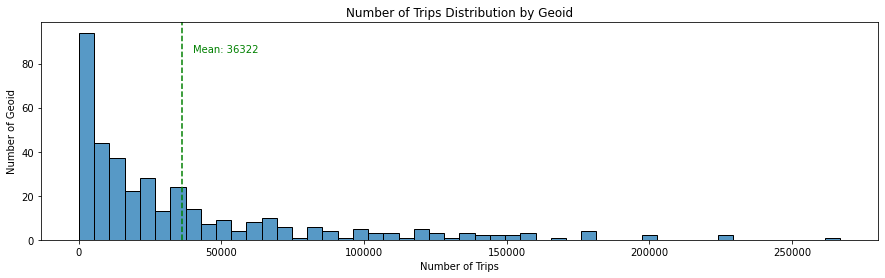

Average Number of Trips :  36322
Min Number of Trips :  47
Max Number of Trips :  266800


In [9]:
# Average Calculation 
mean_start= np.mean(trips_start_df['Number of Trips'])

# Max and Min Trips Calculation
min_start=np.min(trips_start_df['Number of Trips'])
max_start=np.max(trips_start_df['Number of Trips'])

# Draw the Number of Trips plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,4),sharey=True)
sns.histplot(data=trips_start_df,x="Number of Trips",bins=50,ax=ax1)
ax1.axvline(mean_start, color="green", linestyle="dashed")
ax1.text(40000,85,'Mean: 36322', fontsize=10, color='green')
ax1.set_title("Number of Trips Distribution by Geoid")
ax1.set_xlabel('Number of Trips')
ax1.set_ylabel('Number of Geoid')
plt.show()

print("Average Number of Trips : ","{:.0f}".format(mean_start))
print("Min Number of Trips : ","{:.0f}".format(min_start))
print("Max Number of Trips : ","{:.0f}".format(max_start))

The average number of trips taken from each geoid is 36322. The minimum number of trips taken from a geoid is 47, and the maximum number of trips taken from a geoid is 266800. 

Furthermore, from this histogram we can see that the distribution of the number of trips across census tracts is right-skewed, and the majority of geoids have 0-50000 trips taken. We will use this average number of trips to compare if the number of trips taken at a geoid is above or below average.

#### Where are the Census Tracts with Large Amount of Stations Located?

Now we will look more closely at where the geoids with 6, 7, and 9 stations are located. Although location wasn't an initial preregistered analysis or part of the "NYC demographics" in our research question, we believe that it may be an important factor as to explaining the distribution of stations so we will be looking into it in this step.

In [8]:
# extract geoids with 6,7,9 stations
print(trips_start_df.loc[trips_start_df['Number of Stations'].apply(lambda x: True if x in [6,7,9] else False)].sort_values(by=['Number of Stations']))

         geoid  Number of Stations  Number of Trips
3  36061009900                   6           228036
4  36061008300                   6           180253
5  36047003500                   6            69406
6  36047051500                   6            35621
7  36061010300                   6           181434
8  36061004400                   6           178200
9  36061002100                   6           145449
1  36061000700                   7           159969
2  36081001900                   7            15514
0  36047005300                   9            23110


<img src="../images/4.png" width="700">

In [9]:
#Calculate a quantile metric
print("Percentile of Number of Trips")
print(trips_start_df[['Number of Trips']].quantile([.5,.6,.90, .95]))

Percentile of Number of Trips
      Number of Trips
0.50          18126.0
0.60          26840.8
0.90         101431.6
0.95         138472.4


The colored map above shows the census tracts with 6, 7, and 9 stations. These census tracts were located by finding the census tracts in the dataset with 6,7,9 stations and then locating them through the <a href="https://popfactfinder.planning.nyc.gov/#13.72/40.7213/-73.95609"> NYC dot</a>. (We can locate the census tract by inserting its geoid into the search box). We also created a table, whose observation correspond to the marked census tracts on the map, and which contains the number of stations and the number of trips taken from that census tract. Lastly, we displayed various percentile information for the number of trips taken from each census tract, as it would help us make estimates as to why these census tracts have an above average number of stations. The information listed below are all estimates we have made as to why there are so many stations in these census tracts. 

##### **Census Tracts with 6 Stations**
The geoids labeled A,B,C on the map are located near a dock area. These areas tend to have open space for bike riding. We can also see that these places (A,B,C) also have a large amount of trips taken which serves as a reason to why there are more stations in those geoids compared to other areas. 

For the census tracts D and E, they are both located near the dock areas of Manhattan and these areas also tend to have designated spaces for bike riding. Furthermore, the number of trips taken from these census tracts are 
145449 and 178200 respectively, which is above the 95th percentile of the number of trips taken. Thus both the location and number of trips taken from this census tract may explain why there is a higher then average amount of stations in this census tract. 

The distribution of 6 stations in geoid F doesn't seem to have a significant relationship with location or number of trips. It is not located in a dock area and there are no parks nearby. Also, the number of trips taken at this geoid is above the 60th percentile but below the 90th percentile. There may be other reasons as to why there are 6 stations in this location. 

Census tract G seems to have a park located within that geoid. Though the number of trips taken at this point is below the 60th percentile, the presence of a park may be what is influencing the number of stations in this census tract. 

##### **Census Tracts with 7 Stations**
For geoids with 7 stations, the geoid labeled H is located in the dock area and 159969 trips where taken in those stations. The amount of trips taken in geoid H is above the 95th percentile. So both the location and the significant amount of trips taken at that location seems to have contributed to why there are 7 stations in this census tract.

The geoid I is located somewhat near the dock area but has 15514 number of trips taken which is below the 50 percentile of trips taken. There maybe additional reasons as to why there are so many stations in this area too. 

##### **Census Tracts with 9 Stations**
Geoid J with 9 stations is located in the dock area. The number of trips taken at this place is very low. However, despite this fact, there are 9 stations placed in this location which is the largest number of stations among all the census tracts. This might indicate that there are other reasons as to why so many stations are placed in this census tract. 

An overall pattern we can see here is that many of the stations are placed in census tracts that are in dock areas or have a park within it. Along the dock areas, though they are not parks, there seems to be more station placement. Places that have more stations but less a usage tend to have such a distribution because there is a nearby park or because the census tract is located in a dock area.

Also these areas with more stations don't always seem to have a greater amount of trips taken as many of them have trips taken between the 50% percentile and the 60% percentile of total amounts of trips. From looking through this data we have also found the reason behind why there are so many stations in census tracts F and I to be unclear. 


Looking at the location and the amount of trips of these geoids with the most amount of stations we found that,
 - Many of these geoids are located in dock areas or have a park within it. This shows that citibike tends to concentrate its stations in these public areas. However, this is not always the case as we can find in geoid F and I
 - Approximately 40% (4 out of the top 10 census tracts with most stations) have trips taken that lie between the 50th percentile and the 60th percentile of the total number of trips from a census tract, a comparatively average amount of trips taken compared to the overall amount

Here we have looked at the relationship between geoids with the most stations and the location. We were able to find some relationship here. Now we will go back to our original analysis 1 about the relationship between stations and trips. In the scatterplot above we observed that there may be a positive relationship between trips and stations.

Next, we will be conducting linear regression to evaluate and numerically confirm the relationship between the number of trips and the number of stations.

### Linear Regression of Trips vs Stations

Now we will be conducting **Linear Regression** to evaluate whether what we estimate from our scatterplot holds true numerically.
##### Formula: 
>$y_i = \alpha + \beta_1 Stations$ 

#### Hypothesis
We expect that census tracts with more stations will have more trips.

>##### H0: There is no relationship between the number of trips and the number of stations in a geoid
>##### Ha: There is a relationship between the number of trips and the number of stations in a geoid

The significance level will be 0.05. We will use the number of stations as the predictor and the number of trips as the response variable. 

/Users/seongheelee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Coefficient of Linear Regression (StartStations): 1.84e+04
coefficient of determination (r2) for Start Stations: 0.28


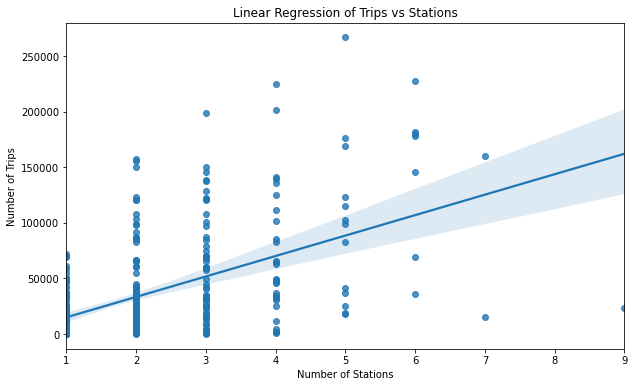

In [10]:
X = trips_start_df.iloc[:, 1].values.reshape(-1, 1) 
Y = trips_start_df.iloc[:, 2].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
lr=linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 

fig = plt.subplots( figsize=(10,6))
sns.regplot(X, Y)
plt.title('Linear Regression of Trips vs Stations')
plt.xlabel('Number of Stations')
plt.ylabel('Number of Trips')

print("Coefficient of Linear Regression (StartStations): {:.3g}".format(lr.coef_[0][0]))

residual = Y-Y_pred
mean_Y= np.mean(Y)
rsq=residual *residual
ssr =sum(rsq)
sst = sum((Y-mean_Y)**2)
deter=ssr/sst

print("coefficient of determination (r2) for Start Stations: {:.2f}".format(1-deter[0]))


Above we have computed a sns regplot. The blue line refers to the linear regression line. The translucent band lines, however, describe a bootstrap confidence interval generated for the estimate. Here we can see that as the number of trips increases the range of the bootstrap confidence interval increases too. This means as the number of trips increases, the size of the confidence interval for the regression estimate increases accordingly making it harder to estimate the number of stations with the number of trips. 

##### Interpertation of the Linear Regression

The slope of the linear regression is 1.84e+04 This tells us that when the number of trips in a census tract increases by 1, the number of stations in the census tract would increase by 
For a linear regression with the stations as a predictor, the slope is 1.84e+04. It tells us that when the number of trips increases by 1 in a geoid, the number of stations in a geoid will change(increase) by 1.84e+04. This is a very small value signifying that the change in the number of stations will only result in a small change in the number of trips.

We can interpret 𝑟2 as the fraction of the variation in the output variable that can be explained (or predicted) by variation in the input variable(s). Therefore our r2 score of 0.28 means that approximately 28% (0.28) of the variation in Y(trips) can be explained(predicted) by X(stations). In other words, the variability in the number of trips is explained well by the number of stations by approxmately 28% (0.28).

Now we will test this linear regression and compute additional statistics.

In [11]:
#rename columns
trips_start_df = trips_start_df.rename(columns={'Number of Trips': 'Trips', 'Number of Stations': 'Stations'})
sm_model = smf.ols("Stations ~ Trips", data=trips_start_df)
result = sm_model.fit()
print("Linear Regression of Trips & Stations",result.summary(),"\n")



Linear Regression of Trips & Stations                             OLS Regression Results                            
Dep. Variable:               Stations   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     143.6
Date:                Tue, 11 May 2021   Prob (F-statistic):           3.21e-28
Time:                        15:53:48   Log-Likelihood:                -571.17
No. Observations:                 375   AIC:                             1146.
Df Residuals:                     373   BIC:                             1154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     

In [13]:
pear_corr=trips_start_df['Trips'].corr(trips_start_df['Stations'])
sp_corr= trips_start_df['Trips'].corr(trips_start_df['Stations'],method='spearman')

print('Pearson Correlation: ',"{:.2f}".format(pear_corr))
print('Spearman Correlation: ',"{:.2f}".format(sp_corr))

Pearson Correlation:  0.53
Spearman Correlation:  0.48


Here we can see that the p-value is nearly 0. Here this means that assuming that there is no relationship between the trips and stations the probability that we would observe a relationship like this is nearly 0. So we reject the null hypothesis that there is no relationship between the trips and stations.

However, just because we rejected the null does not automatically mean that there is a significant relationship between the trips and stations. To understand the strength of the relationship between trips and stations we will look at the correlation. Here we observe a Pearson correlation of 0.53 and a Spearman Correlation of 0.48. Overall, with a correlation of approximately 0.5, we can observe a linear relationship of moderate strength. 

Overall, through our p-value we reject the null hypothesis that "There is no relationship between the number of trips and the number of stations in a geoid". However, through our correlation scores of approximately 0.5, we can conclude that the relationship between the trips and stations is moderate. Therefore through these analysis we can conclude that **there is a moderate relationship between the Trips and Station**. **It seems that the placement of stations in geoids is affected by other factors than on soley the demand of citibike usage** 

In our analysis above we have found that the distribution of citibike stations in NYC is somehow influenced by location. In our next step of our analysis, we will see how representitive citibike is of different race and income groups. In this step, we will be looking at the Race/Income distribution of NYC census data alongside the distribution of stations to understand the distribution of citibike with accordance to different race and income groups of NYC.

## Analysis 2: What is the relationship between station placement and NYC race & income?

To further our understanding of the factors influencing Citibike station placements, we will look into the relationship between the race and income of a census tract and the number of stations located in the census tract. 

### Stations vs Racial Distribution 

We will first try to understand the relationship between station placements across census tracts and the racial distribution of the census tracts. Since NYC is a very diverse city and is known to have an uneven distribution of races, where certain ethnic groups are known to congregate in certain neighborhoods, such as in Chinatown, we decided to first categorize each census tract by their majoirty race. This is done, in order to study the relationship between census tracts with a particular majority race and the number of stations in that census tract, and it allows us to parse out what the specific dynamics are between each race and station placements. Furthermore, since we want to focus on the relationship between different race groups and station placements, we will not be including the "other" race category in our analysis. This is because the race category "other" is ambiguous and potentially misleading since it could encompass many different races. 

In [12]:
race_income_df['white_pct'] = 100*(race_income_df['2017_white_population'] / race_income_df['2017_population'])
race_income_df['black_pct'] = 100*(race_income_df['2017_black_population'] / race_income_df['2017_population'])
race_income_df['asian_pct'] = 100*(race_income_df['2017_asian_population'] / race_income_df['2017_population'])
race_income_df['other_pct'] = 100*(race_income_df['2017_other_population'] / race_income_df['2017_population'])
# Combining the race and stations
race_st_df = (race_income_df.set_index('geoid')).join((stations_df.set_index('geoid')),how='inner')
race_st_df['geoid'] = race_st_df.index
race_st_df.reset_index(drop=True,inplace=True)
# Counting the number of stations per geoid
stations =race_st_df.groupby('geoid')[['station_id']].count()
stations.rename(columns={'station_id':'num_stations'},inplace=True)
stations.reset_index(inplace=True)
race_st_df = race_st_df.set_index('geoid').join(stations.set_index('geoid'),how='inner')
race_st_df.reset_index()
race_st_df[:1]
# assigning the majority race based on the max percentage race in each geoid
race_st_df['majority_race'] = race_st_df[['white_pct','black_pct','asian_pct', 'other_pct']].idxmax(axis=1)
# Only returns the census tracts where that race is the majority
w_major = race_st_df[race_st_df['majority_race'] == 'white_pct']
b_major = race_st_df[race_st_df['majority_race'] == 'black_pct']
a_major = race_st_df[race_st_df['majority_race'] == 'asian_pct']
o_major = race_st_df[race_st_df['majority_race'] == 'other_pct']

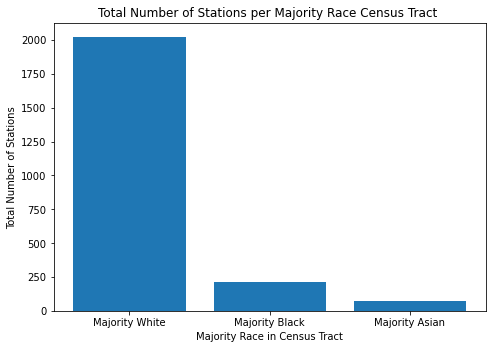

In [13]:
w_list = []
b_list = []
a_list = []
o_list = []
for i  in range(10):
    w_list = w_list + [race_st_df[race_st_df['num_stations'] == i].white_pct.mean()]
    b_list = b_list + [race_st_df[race_st_df['num_stations'] == i].black_pct.mean()]
    a_list = a_list + [race_st_df[race_st_df['num_stations'] == i].asian_pct.mean()]
    o_list = o_list + [race_st_df[race_st_df['num_stations'] == i].other_pct.mean()]
    
df = DataFrame (w_list,columns=['White Percentage'])
df['Black Percentage'] = b_list
df['Asian Percentage'] = a_list
df['Other Percentage'] = o_list
df= df[1:]
df = df.fillna(0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = ['Majority White', 'Majority Black', 'Majority Asian']
x = [w_major.num_stations.sum(), b_major.num_stations.sum(), a_major.num_stations.sum()]
plt.bar(y,x)
plt.title('Total Number of Stations per Majority Race Census Tract ')
plt.xlabel('Majority Race in Census Tract')
plt.ylabel('Total Number of Stations')
plt.show()

This bar graph shows the total number of stations in each of the majority race census tracts. From this bar graph, we can see that there is a much higher total number of stations across all of the predominantly white census tracts, which have in total close to 2000 stations, compared to majority Black and Asian census tracts. The very large difference in the number of stations in majority-white census tracts compared to black and Asian census tracts is very surprising, as although the most common ethnicity in NYC is White, the racial breakdown of NYC as a whole in 2017 is as follows: 47% White, 24% Black, and 17% Asian. Meaning that if the stations were placed at random, we would expect there to be roughly two times more stations in predominantly White areas compared to Black areas and approximately three times more stations in White areas compared to Asian areas. Thus, since the number of stations placed in White census tracts is almost eight times more than in Black census tracts and 20 times more than in Asian census tracts, this indicates that the placement of Citi Bike stations across each majority race census tract was done deliberately. 

Overall, this bar graph is a useful initial visualization of the distribution of stations across all of the different different majority race census tracts in NYC. However, to better understand the relationship between the placement of stations across census tracts and the racial distribution of the census tract, we will next look into the differences in racial distribution between census tracts with less then the median number of stations and the census tracts with above the median number of stations. 

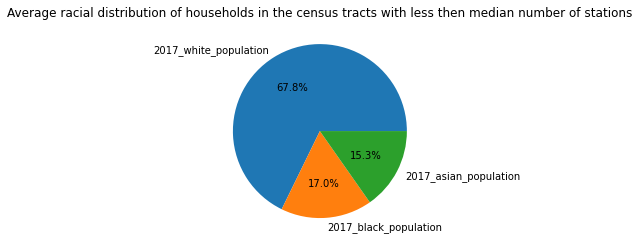

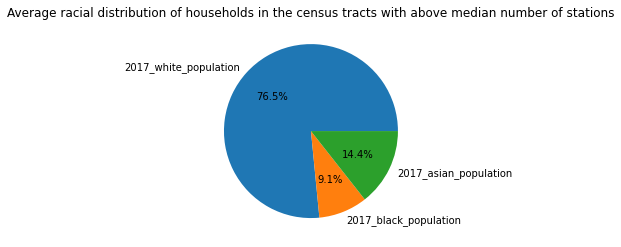

In [14]:
median_num_stations = int(race_st_df[['num_stations']].median())

#Census Tracts with <= median number of stationm
low_station_geoid_race_income_df = race_st_df[race_st_df['num_stations']<=median_num_stations]
low_station_geoid_race_sum = low_station_geoid_race_income_df[['2017_white_population','2017_black_population','2017_asian_population']].sum()
mylabels = low_station_geoid_race_sum.index
plt.pie(low_station_geoid_race_sum,labels=mylabels,autopct='%1.1f%%')
plt.title('Average racial distribution of households in the census tracts with less then median number of stations')
plt.show()

##Census Tracts with > median number of stationm
high_station_geoid_race_income_df = race_st_df[race_st_df['num_stations']>median_num_stations]
high_station_geoid_race_sum = high_station_geoid_race_income_df[['2017_white_population','2017_black_population','2017_asian_population']].sum()
mylabels = high_station_geoid_race_sum.index
plt.pie(high_station_geoid_race_sum,labels=mylabels,autopct='%1.1f%%')
plt.title('Average racial distribution of households in the census tracts with above median number of stations')
plt.show()

These two pie charts, illustrate the differences in the racial distribution of census tracts with less then or equal to the median number of stations and census tracts with more than the median number of stations. From these two pie charts, we see that on average census tracts that have an above median number of stations on average have 76.5% white individuals whereas Census tracts that have less then the median number of stations are only 67.8% white. Furthermore, Census tracts that have the larger number of stations on average appears to have half the number of black individuals (9.1%), as compared to census tracts with less number of stations (15.3%). Lastly, census tracts with more stations also have slightly less Asians compared to Census tracts with less stations. Thus, these two pie charts imply that more stations are generally placed in census tracts that have a higher percentage of White individuals and that have a lower percentage of Black and Asian individuals. However, this relationship cannot be confirmed through these pie charts alone, so in the next step we will use Logistic Regression to model the relationship between the racial distribution of a census tract and the number of Citi Bike stations in the census tract. 

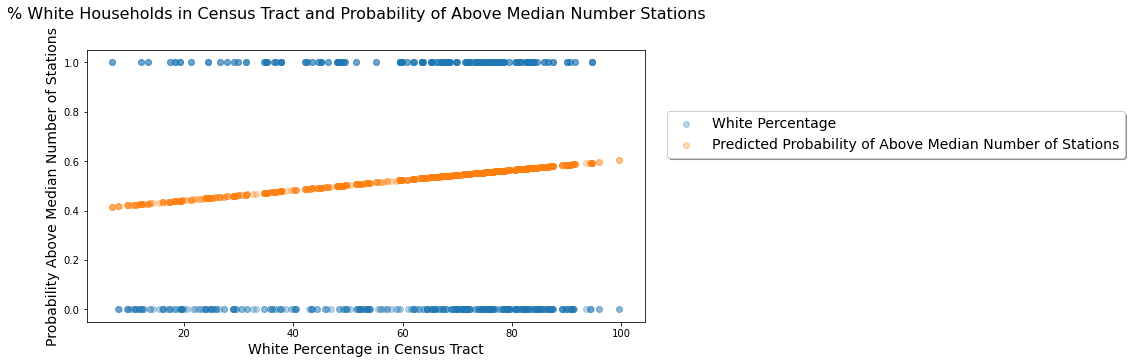

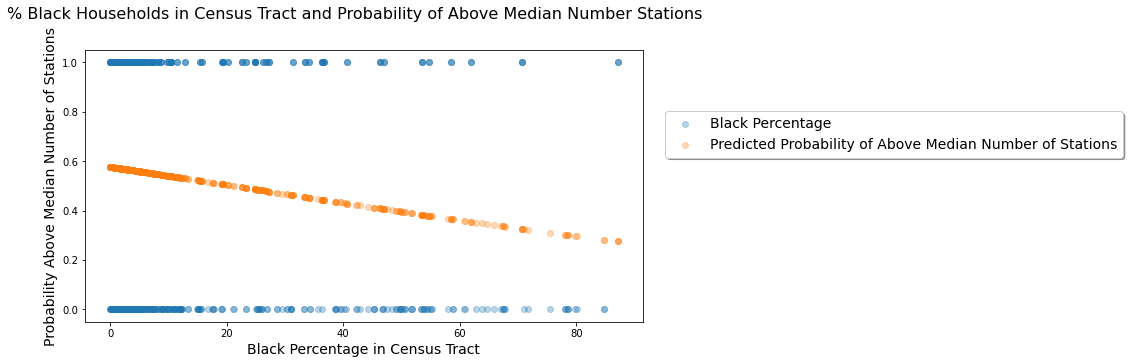

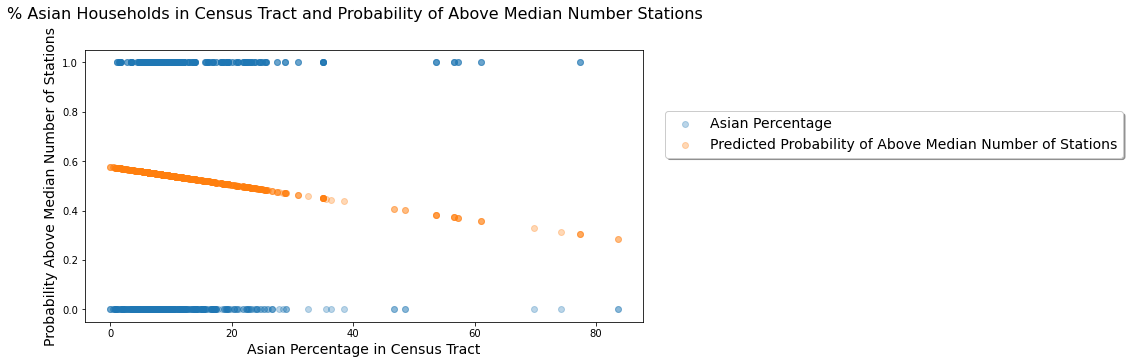

R^2 value of White Percentage and Above Median Stations: 0.54
R^2 value of Black Percentage and Above Median Stations: 0.56
R^2 value of Asian Percentage and Above Median Stations: 0.53


In [15]:
race_st_df['above_median_station'] = np.where(race_st_df['num_stations']>= median_num_stations, True, False)
racevsstations_w = LogisticRegression().fit(race_st_df[['white_pct']],race_st_df['above_median_station'])
predict_num_stations_w = racevsstations_w.predict(race_st_df[['white_pct']])

racevsstations_w.predict_proba(np.array([[50]]))
racevsstations_w.predict(np.array([[50]]))
# Logistic Regression for White Percentages and Above Median Number Stations
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.white_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='White Percentage'
)
plt.scatter(
    race_st_df.white_pct, 
    racevsstations_w.predict_proba(race_st_df[['white_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1, fontsize = 14)
plt.xlabel("White Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability Above Median Number of Stations", fontsize = 14)
plt.suptitle('% White Households in Census Tract and Probability of Above Median Number Stations', size=16, y=1);      
plt.show()
# Logistic Regression for Black Percentages and Above Median Number Stations

racevsstations_b = LogisticRegression().fit(race_st_df[['black_pct']],race_st_df['above_median_station'])
predict_num_stations_b = racevsstations_b.predict(race_st_df[['black_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.black_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Black Percentage'
)
plt.scatter(
    race_st_df.black_pct, 
    racevsstations_b.predict_proba(race_st_df[['black_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Black Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability Above Median Number of Stations", fontsize = 14)
plt.suptitle('% Black Households in Census Tract and Probability of Above Median Number Stations', size=16, y=1);      
plt.show()

#Logistic Regression for Asian Percentages and Above Median Number Stations
racevsstations_a = LogisticRegression().fit(race_st_df[['asian_pct']],race_st_df['above_median_station'])
predict_num_stations_a = racevsstations_a.predict(race_st_df[['asian_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.asian_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Asian Percentage'
)
plt.scatter(
    race_st_df.asian_pct, 
    racevsstations_b.predict_proba(race_st_df[['asian_pct']])[:,1], 
    alpha = 0.3,
    label='Predicted Probability of Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Asian Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability Above Median Number of Stations", fontsize = 14)
plt.suptitle('% Asian Households in Census Tract and Probability of Above Median Number Stations', size=16, y=1);      
plt.show()

w_r_sqr = racevsstations_w.score(race_st_df[['white_pct']],race_st_df['above_median_station'])
print('R^2 value of White Percentage and Above Median Stations:', round(w_r_sqr,2))

b_r_sqr = racevsstations_b.score(race_st_df[['black_pct']],race_st_df['above_median_station'])
print('R^2 value of Black Percentage and Above Median Stations:', round(b_r_sqr,2))

a_r_sqr = racevsstations_a.score(race_st_df[['asian_pct']],race_st_df['above_median_station'])
print('R^2 value of Asian Percentage and Above Median Stations:', round(a_r_sqr,2))

Since, the number of stations in a census tract is a discrete, we decided to use logistic regression instead of linear regression when trying to model the relationship between the racial percentage in each census tract and the number of stations in the Census Tract, as logisitic regression is a better model to use when the response variable (in this case number of stations) is categorical. Furthermore, since logisitc regression requires that the response variables takes a binary value, we decided to add a column to the dataframe that classifies wether the census tract has above the median number of stations. Then, we used logistic regression to predict the probability that a census tract has more than the median number of stations based on its racial distribution. Thus each of the three graphs above, show how the predicted probability of a census tract having above the median number of stations changes with the percentage of each race in the census tract: White, Black, and Asian. 

In the first graph, the predicted probability seems to have a positive slope. This indicates that census tracts with a higher proportion of White individuals have a greater probability of having more than the median number of stations. On the other hand, the predicted probability in the second graph has a negative slope. This indicates that census tracts with a higher propotion of Black individuals are less likely to have more than the median number of stations. 
In the third graph, the relationship between the proportion of Asian individuals in a census tract and the number of stations also follows a similar relationship as the one in the second graph. Furthermore, we see that the three predictor models are able to account for 54%, 55%, and 53% of the variability in the data, meaning that we can conclude that there is a fairly strong relationship between the percentage of each race in a census tract and the number of stations in the census tract. 

Overall, these three graphs confirms the trend that we have seen previously in the previous analysis, as they suggest that that more stations are generally being placed in Whiter census tracts, and that census tracts with a higher percentage of Black and Asian individuals genrally have a lower number of stations. 

Since we've now confirmed that there is a relationship between race and number of stations, we now want to look into other factors that may play a role in influencing the distribution of Citi Bike stations in NYC. One such, factor that we think may influence the disitrbution of Citi Bike stations is the income levels of a census tract. 

### Stations vs Income 

During Citi Bike's initial expansion into NYC, it was placed in relatively high income areas to ensure its usage <cite>[Wenya et. al.][1]</cite>. This is because an annual membership to Citi Bike costs an annual amount of 169 dollars<cite> [NYTimes] [2]</cite>. This cost can be prohibitive to many communities.

However, Citi Bike also has a program that allows public housing residents and food stamp users to buy a membership at 60 dollars a year <cite>[2]</cite>. With these two factors regarding cost in mind, it's important to study whether station placement allows residents from different income brackets to utilize Citi Bike.

[1]:https://www.researchgate.net/publication/328756164_The_Cost-Effectiveness_of_Bike_Share_Expansion_to_Low-Income_Communities_in_New_York_City
[2]:https://www.nytimes.com/2019/07/16/nyregion/citi-bike-nyc-bronx.html

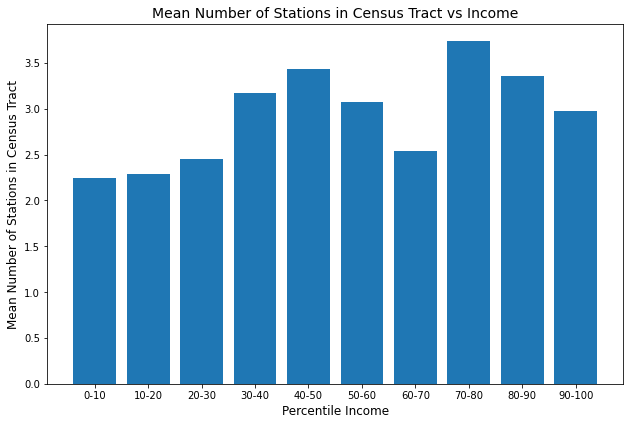

In [16]:
income = race_st_df['2017_median_income']
tenth = race_st_df[(race_st_df['2017_median_income']<=np.percentile(income, 10))].num_stations.mean()
bw_10_20 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 10)) & (race_st_df['2017_median_income']<=np.percentile(income, 20))].num_stations.mean()
bw_20_30 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 20)) & (race_st_df['2017_median_income']<=np.percentile(income, 30))].num_stations.mean()
bw_30_40 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 30)) & (race_st_df['2017_median_income']<=np.percentile(income, 40))].num_stations.mean()
bw_40_50 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 40)) & (race_st_df['2017_median_income']<=np.percentile(income, 50))].num_stations.mean()
bw_50_60 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 50)) & (race_st_df['2017_median_income']<=np.percentile(income, 60))].num_stations.mean()
bw_60_70 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 60)) & (race_st_df['2017_median_income']<=np.percentile(income, 70))].num_stations.mean()
bw_70_80 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 70)) & (race_st_df['2017_median_income']<=np.percentile(income, 80))].num_stations.mean()
bw_80_90 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 80)) & (race_st_df['2017_median_income']<=np.percentile(income, 90))].num_stations.mean()
bw_90_100 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 90)) & (race_st_df['2017_median_income']<=np.percentile(income, 100))].num_stations.mean()
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
y = ['0-10','10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','80-90','90-100']
x = [tenth, bw_10_20, bw_20_30, bw_30_40, bw_40_50, bw_50_60, bw_60_70, bw_70_80, bw_80_90, bw_90_100]
plt.bar(y,x)
plt.title('Mean Number of Stations in Census Tract vs Income', fontsize = 14)
plt.xlabel('Percentile Income', fontsize = 12)
plt.ylabel('Mean Number of Stations in Census Tract', fontsize = 12)
plt.show()

This bar graph groups together census tracts based on the decile which their median income level falls into and it shows the average number of stations in the census tracts that fall in each of these decile groups. By looking at the average number of stations in census tracts that fall within each income decile, we can look at wether there is an overall relationship between income percentile and the number of stations in each census tract. 

From this graph, it would seem that there's a general trend of increasing number of stations at higher percentiles of income. At the zero to 10 percentile, the mean number of stations is around 2.3, whereas census tracts that fall into the 70th to 80th income level, on average have around 3.7 stations. That being said, there are a few anomolies, which do not allow us to definitively conclude that more stations are being placed in Census Tracts that have a higher level of income. In order to further analyze and to confirm this trend, we will next use logistic regression to analyze the relationship between income and the number of stations in a census tract. 

## Logistic Regression

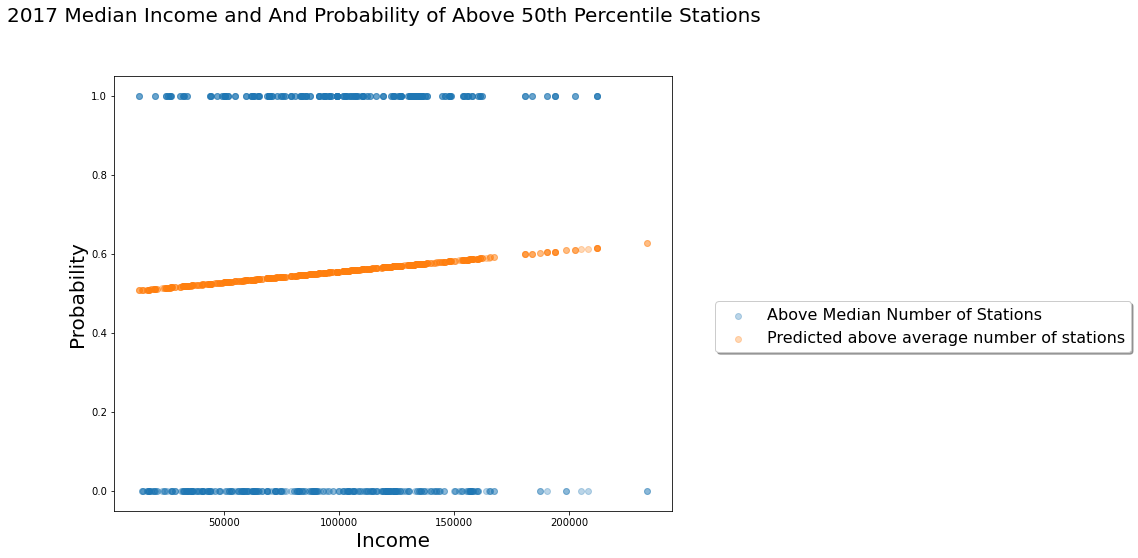

The r^2 value of median income and number of stations: 0.53


In [17]:
incomevsstations = LogisticRegression().fit(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
predict_num_stations_income = incomevsstations.predict(race_st_df[['2017_median_income']])

incomevsstations.predict_proba(np.array([[50]]))
incomevsstations.predict(np.array([[50]]))
fig = plt.figure(figsize = (10,8))

# Plotting the probability of above median stations vs. income
plt.scatter(
    race_st_df['2017_median_income'], 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Above Median Number of Stations'
)
plt.scatter(
    race_st_df['2017_median_income'], 
    incomevsstations.predict_proba(race_st_df[['2017_median_income']])[:,1], 
    alpha = 0.3,
    label='Predicted above average number of stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.5),fontsize = 16, shadow=True, ncol=1)
plt.xlabel("Income", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.suptitle('2017 Median Income and And Probability of Above 50th Percentile Stations', size=20, y=1);      
plt.show()
income_sqr = incomevsstations.score(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
print('The r^2 value of median income and number of stations:', round(income_sqr,2))

In order to further study and confirm the relationship we've observed between income and number of stations, we decided to do a logistic regression. This is because, as with studying race and number of stations, the number of stations only takes a small range of discrete values (1-9), which means logistic regression is better suited to the task. 

This graph looks at the median income of census tracts and their predicted probability of having an above median number of stations. It would seem that at the lower levels of income, the probability of having an above median number of stations is around .5. However, as the income within a census tract increases, the probability slowly increases as well. This indicates that at higher income levels, there is a greater probability of having larger number of stations. Furthermore, because the r^2 value is .53, the prediction model explains 53% of the data which is fairly good.

Now that we have confirmed that race and income does play a role in determining the number of stations in a census tract, and more specifically that more stations are generally placed in White and higher income areas, we next want to look into wether this is a fair distribution of stations. 

## Analysis 3: Relationship between number of trips in census tract and race and income 

Having seen, that more stations are generally located in White and higher income census tracts, we next want to examine wether this is an equittable distribution of stations. To do this, will examine the relationship between the number of trips taken from the census tract and the race and income distribution of the census tract. 

### Trips vs Race 

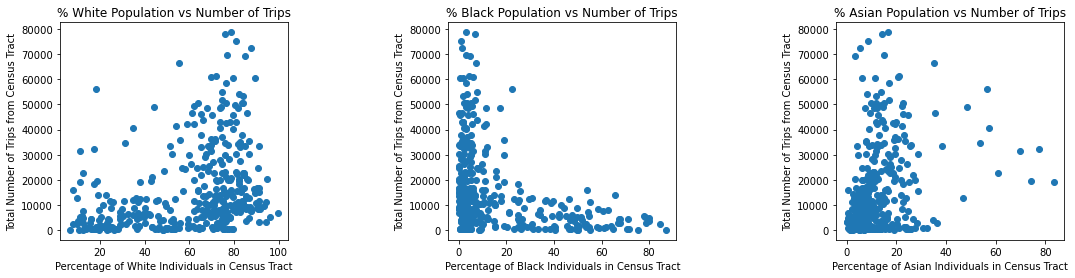

Corr between % of White individuals in a census tracts and # of trips taken from that census tract: 0.33
Corr between % of Black individuals in a census tracts and # of trips taken from that census tract: -0.37
Corr between % of Asian individuals in a census tracts and # of trips taken from that census tract: 0.29


In [19]:
num_trips_geoid = DataFrame(trips_df.groupby('start_station_geoid').size()).rename(columns={0:'num_trips_from_geoid'}).reset_index()
num_stations_geoid = DataFrame(stations_df.groupby('geoid').size()).rename(columns={0:'num_stations'}).reset_index()
num_trips_stations_geoid = num_trips_geoid.merge(num_stations_geoid,left_on='start_station_geoid',right_on='geoid').drop(columns=['start_station_geoid'])
race_trip_station_df = race_income_df.merge(num_trips_stations_geoid,left_on='geoid',right_on='geoid')
race_trip_station_df['trips_per_station'] = race_trip_station_df['num_trips_from_geoid']/race_trip_station_df['num_stations']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.subplots_adjust(wspace=0.7, hspace=None)
fig.set_figwidth(18)

#Percentage White vs number of trips 
ax1.scatter(race_trip_station_df['white_pct'],race_trip_station_df['trips_per_station'])
ax1.set_xlabel('Percentage of White Individuals in Census Tract')
ax1.set_ylabel('Total Number of Trips from Census Tract')
ax1.set_title('% White Population vs Number of Trips')

#percentage Black vs number of trips 
ax2.scatter(race_trip_station_df['black_pct'], race_trip_station_df['trips_per_station'])
ax2.set_xlabel('Percentage of Black Individuals in Census Tract')
ax2.set_ylabel('Total Number of Trips from Census Tract')
ax2.set_title('% Black Population vs Number of Trips')

#percentage Asian vs number of trips 
ax3.scatter(race_trip_station_df['asian_pct'], race_trip_station_df['trips_per_station'])
ax3.set_xlabel('Percentage of Asian Individuals in Census Tract')
ax3.set_ylabel('Total Number of Trips from Census Tract')
ax3.set_title('% Asian Population vs Number of Trips')
plt.show()

print('Corr between % of White individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_trip_station_df.corr()[['white_pct']].loc['trips_per_station'][0]))
print('Corr between % of Black individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_trip_station_df.corr()[['black_pct']].loc['trips_per_station'][0]))
print('Corr between % of Asian individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_trip_station_df.corr()[['asian_pct']].loc['trips_per_station'][0]))

These three scatter plots, show how the total number of trips taken from a census tract changes with respect to the proportion of each racial group in the census tract. From the scatter plot on the left, we see that census tracts which have a large number of Citi Bike trips, are generally census tracts that also have a high percentage of White individuals, this is seen as the points, in the graph, that have a high average y value are generally located on the right hand side of the graph. This is also supported by the possitive corelation score of 0.33. On the other hand, from the scatter plot in the middle, we see that census tracts that have a large number of trips are generally those that have a small proportion of black individuals, furthermore we see that from the points on the right hand side of the scatter plot, census tracts that have a large percentage of Black individuals tend to have a small number of trips. This inverse relationship between the proportion of Black individuals in a census tract and the number of trips taken from the census tract, is also supported by the negative correlation score of -0.37. Lastly, from the scatter plot on the right it is hard to tell what the relationship between the number of stations and the proportion of Asian individuals is, although the positive correlation score of 0.29 suggests that census tracts that have a higher proportion of Asian individuals tend to also have more trips. 

From these diagrams, and correlation values, we can conclude that White census tracts tend to be the ones that have the most trips, and thus viewed from this perspective, Citi Bike's decision to place more stations in generally Whiter census tracts makes sense, as they are purely responding to demand. However, a possible limitation to this finding, is that these predonimantly White census tracts may have had a higher number of trips, purely due to them having more stations, as having more stations increases the availability of bikes, and make it easier for people in the census tract to locate Citi Bike stations. Thus to answer the question of wether Citi Bike is fairly distributing its stations we decided to look into the utilization rate of Citi Bike stations across all of the census tracts, where station utilzation is defined by the number of trips taken per station. 

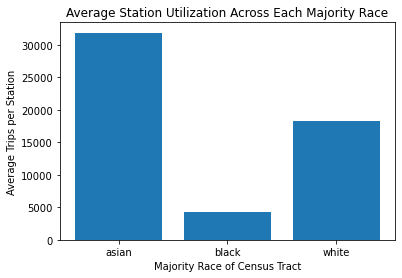

In [20]:
#find the predominant race in each census tract
race_trip_station_df['predominant_race']=race_trip_station_df[['white_pct','black_pct','asian_pct']].idxmax(axis=1).apply(lambda x: 'white' if x=='white_pct' else('black' if x=='black_pct' else 'asian'))
#normalizing number of trips in each census tract by the number of stations
race_trip_station_df['normalized_trips']=race_trip_station_df['num_trips_from_geoid']/race_trip_station_df['num_stations']
ratio_trips_stations_by_race = race_trip_station_df.groupby('predominant_race')['normalized_trips'].mean()
plt.title("Average Station Utilization Across Each Majority Race")
plt.ylabel("Average Trips per Station")
plt.xlabel("Majority Race of Census Tract")
plt.bar(ratio_trips_stations_by_race.index,list(ratio_trips_stations_by_race))
plt.show()

In order to address the limitation in the previous analysis, we normalized the number of trips taken from each census tract by the number of stations located in the census tract, this ratio can also be taught of as the station's utilization. Each census tract is also classified to its majority race in order to make for an easier visualization. Thus, this bar graphs shows the average station utilization rate for census tracts, in each of the majority race categories: White, Black, and Asian. 

Ideally for there to be a fair distribution of stations, we would expect there to be a roughly equal utilization rate across each of the three racial categories, as this would mean that Citi Bike station placements are done purely on the basis of the demand for Citibike by each race, thus meaning that Citi Bike represents all races equaly. 
However, from the bar graph we can see that this is not the case, as on average each station in an Asian census tract has to serve more than 30,000 trips, whereas each station in White and Black census tracts only have to serve roughly 18,000 and 5,000 trips respectively. This means that Citi Bike has placed too little stations in predominantly Asian census tracts, and it has placed too many stations in majority Black census tracts.

Overall, from this graph, we can conclude that Citi Bike isn't wrong in placing more stations in generally White census tracts, since on average Citi Bike station in majoirty White census tracts have a high utilization rate. Furthermore, Citi Bike's decision to place less stations in census tracts with a higher proportion of Black individuals, also makes sense, since stations in majoirty black census tracts have a very low utilization rate, meaning that Black census tracts are already over represnted by Citi Bike as there are too many stations placed in Black census tracts relative to demand. That being said, much more focus needs to be placed on creating stations in predominantly Asian areas as the very high utilization rate of stations in Asian census tracts, might indicate that the demand for Citi Bike is mugh greater then its supply, meaning that there is a shortage of stations in these Asian census tracts. Thus, next we will look into the trend in which Citi Bike has been building its stations to see wether they are actively trying to solve this issue. 

### Predicting Where Stations Will be Made 

From the previous section, we saw that there are too little stations relative to demand in Asian neighborhoods, and that there are too many stations relative to demand in predominantly black neighborhoods. Thus, ideally, Citibike should recognize this issue and should be buidling stations in Asian census tracts at a faster rate compared to in White and Black census tracts. To check wether they are doing this, we will analyze the locations where Citibike stations have been made in the past, and look at the rate in which Citibike stations are being added to White, Asian, and Black neighborhoods. 

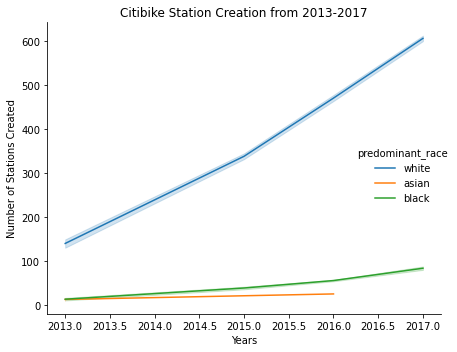

In [21]:
race_income_df['predominant_race']=race_income_df[['white_pct','black_pct','asian_pct']].idxmax(axis=1).apply(lambda x: 'white' if x=='white_pct' else('black' if x=='black_pct' else 'asian'))
stations_df = stations_df.merge(race_income_df[['geoid','predominant_race']],left_on='geoid',right_on='geoid')
stations_df['first_trip']=pd.to_datetime(stations_df['first_trip'])
stations_df['cum_total_stations_per_race'] = stations_df.groupby('predominant_race')['first_trip'].rank(method='first',ascending=True)
stations_df['year_station_made'] = stations_df['first_trip'].apply(lambda x: x.year)
sns.relplot(x='year_station_made',y='cum_total_stations_per_race',hue='predominant_race',data=stations_df,kind='line')
plt.title('Citibike Station Creation from 2013-2017')
plt.xlabel('Years')
plt.ylabel('Number of Stations Created')
plt.tight_layout()
plt.show()

This line graph shows how the number of Citi Bike stations in each majoirty race census tract has changed from 2013, which is the year Citi Bike started in NYC, up to 2017. From this graph we see that since 2013, the number of Citi Bike stations in majority White census tracts, have increased rapidly. On the other hand, the number of Citi Bike stations in Asian areas has increased very slowly. Thus, this shows how Citibike has continued to emphasize creating stations in White census tracts, while neglecting Asian and Black census tracts. Thus, it seems as though Citi Bike has not recognized its problem of having too little stations in Asian census tracts, and has not taken steps to solve it. To confirm this finding, we will next use a Linear Regression model to predict the number of Citi Bike stations in each of these census tracts in the future to see whether it would adequately account for demand. 

In [22]:
def station_predictor_by_race(race):
    '''
    Predicts the number of stations in neighborhoods of the given predominant race in 2019-2025
    '''
    dates = pd.Series(['2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01','2024-01-01','2025-01-01'])
    dates=pd.to_datetime(dates)
    dates  = dates.map(dt.datetime.toordinal) #convert dates to numeric so they can be used as the input to the regression
    stations_predictor = LinearRegression()
    stations_race = stations_df[stations_df['predominant_race']==race]
    stations_predictor.fit(stations_race[['first_trip_numeric']],stations_race['cum_total_stations_per_race'])
    return stations_predictor.predict(dates.values.reshape(-1,1))

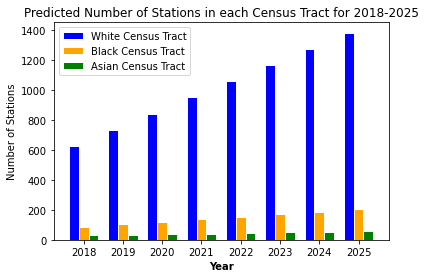

In [23]:
stations_df['first_trip_numeric']  = stations_df['first_trip'].map(dt.datetime.toordinal)
num_white_stations = station_predictor_by_race('white')
num_black_stations = station_predictor_by_race('black')
num_asian_stations = station_predictor_by_race('asian')
dates = [2018,2019,2020,2021,2022,2023,2024,2025]

# set width of bars
barWidth = 0.25 
# Set position of bar on X axis
r1 = np.arange(len(num_white_stations))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plot
plt.bar(r1, num_white_stations, color='blue', width=barWidth, edgecolor='white', label='White Census Tract')
plt.bar(r2, num_black_stations, color='orange', width=barWidth, edgecolor='white', label='Black Census Tract')
plt.bar(r3, num_asian_stations, color='green', width=barWidth, edgecolor='white', label='Asian Census Tract')
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(num_white_stations))], ['2018', '2019', '2020', '2021', '2022', '2023','2024','2025'])
plt.ylabel('Number of Stations')
plt.title('Predicted Number of Stations in each Census Tract for 2018-2025')
# Create legend & Show graphic
plt.legend()
plt.show()

This bar graph shows the predicted number of stations in each predominant race census tract, from 2018 to 2025 asumming that Citi Bike continues to distribute its stations like its currently doing. From this graph, we see that the number of stations in majority Asian and Black census tracts increases very slowly throughout this time period, whereas the number of stations in White Census Tract increases the most. This confirms our intuition from the previous analysis, that if Citi Bike doesn't change how it places stations then the problem of having too little stations relative to demand in Asian census tracts would continue to exists. Thus, this shows that changes have to be made by Citi Bike, as it should begin placing more stations in Asian neighborhoods. Now, that we have evaluated the fairness of Citi Bike placing more stations in White census tracts, we now want to evaluate wether it is equitable for Citi Bike to be placing more stations in higher income census tracts. 

### Trips vs Income 

Having explored the fairness of Citi Bike placing more stations in White areas, we now want to to evaluate wether it is fair for Citi Bike to be placing more stations in areas of higher income. To do this we will explore the relationship between the number of trips taken from a census tract, and the income level of the census tract. 

In [47]:
NY_map = folium.Map(location=[40.7563748, -73.9808861],zoom_start = 13) 
trip_q1=np.percentile(race_trip_station_df["normalized_trips"],25)
trip_q2=np.percentile(race_trip_station_df["normalized_trips"],50)
trip_q3=np.percentile(race_trip_station_df["normalized_trips"],75)
for i in range(len(race_trip_station_df["2017_median_income"])-1):
    if race_trip_station_df["normalized_trips"][i+1]<trip_q1:
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'red',fill_opacity=0.7).add_to(NY_map)
    
    elif (race_trip_station_df["normalized_trips"][i+1]>trip_q1 and race_trip_station_df["normalized_trips"][i+1]<trip_q2):
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'green',fill_opacity=0.7).add_to(NY_map)

    elif (race_trip_station_df["normalized_trips"][i+1]>trip_q2 and race_trip_station_df["normalized_trips"][i+1]<trip_q3):
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'blue',fill_opacity=0.7).add_to(NY_map)
    else:
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'yellow',fill_opacity=0.7).add_to(NY_map)
NY_map

This map shows how the number of trips relates to the income level across all of the census tracts in NYC that have at least one Citi Bike station. In this graph, the income level of a census tract were grouped into 4 disitinct groups: 1st quartile, 2nd quartile, 3rd quartile, and 4th quartile and they were given the colors red, green, blue, and yellow respectively. The location of each dot corresponds to the central longitdue and latitude of each census tract, and the size of each dot is representative of the number of trips taken from each station in the census tract, with the larger the size indicating that more trips were taken per station in that census tract, which also means that there was better station utilization. 

From this map, we can see that census tracts whose median income fall below the 25th percentile generally have much less number of trips per station compared to the other income levels, as seen by the generally much smaller size of the red dots. This means that stations in generally poorer areas are less utilized. Furthermore, we can see that the in general the smallest green and blue points are relatively much smaller than the smallest yellow points, which indicate that the lower end for the number of trips per stations in census tracts whose median income falls within the 25th to 75th percentile of income is smaller then the lower end for the number of trips per station taken from census tracts whose income is above the 75th percentile. This means that even the worst utilized stations in census tracts above the 75th percentile of income, still have a higher utilization rate then stations in the 25th to 75th income percentile. However, the size of the largest green and blue points are roughly the same size as the largest yellow dots, indicating that the census tracts whose number of trips is on the higher end of their repsective income groups all have a similar station utilization rate. 

Overall, from this map we suspect that there exists a possitive relationship between the income level of a census tract and the number of trips taken per station from the census tract. Next, to check wether or not this is true we will apply a linear regression to model the income level and the number of trips taken from a census tract. 

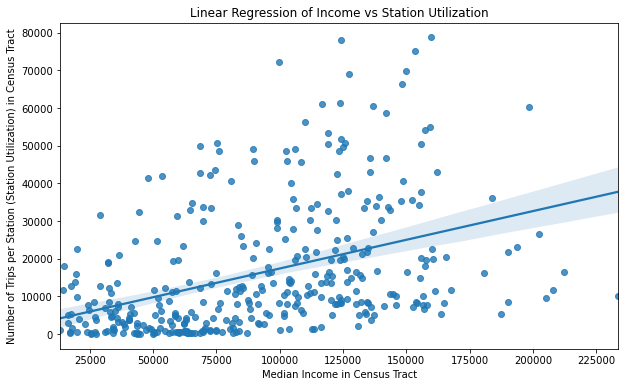

Income slope: 0.15
R^2 score: 0.17


In [83]:
lr = LinearRegression()
lr.fit(race_trip_station_df[['2017_median_income']], race_trip_station_df['trips_per_station'])
X = race_trip_station_df['2017_median_income']
Y = race_trip_station_df['trips_per_station']

fig = plt.subplots( figsize=(10,6))
sns.regplot(x=X, y=Y)
plt.title('Linear Regression of Income vs Station Utilization')
plt.xlabel('Median Income in Census Tract')
plt.ylabel('Number of Trips per Station (Station Utilization) in Census Tract')

plt.show()

print('Income slope: {:.2f}'.format(lr.coef_[0]))
print('R^2 score: {:.2f}'.format(lr.score(race_trip_station_df[['2017_median_income']], race_trip_station_df['trips_per_station'])))

From the scatter plot, we can see that in general the higher the median income of the census tract the higher the station utilization rate in the census tract. This can also be seen by the possitve slope of 0.15 in the linear regression which can be interpreted as, a one dollar increase in the median income of a census tract will result in a 0.15 in the number of trips taken per station in the census tract. The R^2 score of 0.17 tells us that income alone is able to explain around 17% of the variability in the number of trips per station in a census tract. This 17% is slightly low, but it makes sense since we have seen previously that factors other then income such as the racial distribution of a census tract also plays a role in determining the station utilization rate in the census tract. 

Thus, from these findings we can say that it seems fair that Citi Bike is placing more stations in higher income areas, since even when more stations are placed in higher income census tracts the utilization rate of each of these stations is still higher then the utilizationr rate for stations in lower income census tracts. Thus, by Citi Bike placing more stations in higehr income areas they are merely just trying to keep up with the higher demand in these richer areas.

### Main Statements

rq : how is citibike representing NYC demographics? 


a1 : trips vs stations

Trips cannot predict stations! Station placement is affected by sth else! 


a2: race/income vs stations

There is a relationship between race/income and stations! 


after a1, a2 we need to answer the question of where citibike should be distributed more. 


A3: trips vs race/income
→ white/high income take more trips? (check) 
→ bar graph: looking at both trips and stations  checking fairness by race

→ population normalizaiton




(evalsig)
- A1: permutation trips vs stations really no relationship!
- A2: (sth) to say there is a significant relationship btw race/income and stations
        - could be the lineargraph but should be more straight forward. 


(conclusion)
- interms of race/income not representing NYC demographics well (explain nummerically with graphs)
- in terms of trips not representing NYC demographics well(explain nummerically with graphs)
- seems to be stations located in parks. But the usage of those stations are not that high at all so there isn't a fair distribution (explain nummerically with graphs)

(proposal)
- in what geoids should there be more stations? 
    - single out places that have minority race/incoem and 
- other things citibike can do
    - shrink cost of usage
    - ~~~ safer roads

# Evaluation of Significance 

### 1. Evaluation of Significance for Preregistered Analysis 1

#### Summarization of Results we found in Analysis 1

In our Analysis 1 we concluded with the following results.

- With our p-value of near 0 we reject the null hypothesis that "There is no relationship between the number of trips and the number of stations in a geoid" . 
- On correlation between trips and stations, we get a Pearson correlation of 0.53 and a Spearman correlation of 0.48. The correlation values are around 0.5 which signifies that the strength of relationship between trips and stations is moderate.
- The r2 score is 0.279. This means that approximately 28% of the variance of the stations can be explained by the trips. We also end up with a very similar adjusted r2 value. 

Overall, we concluded that the relationship between the trips and stations was moderate. When looking into the geoids with most stations, we found that location also plays a role in the placement of stations. With a moderate relationship between trips and stations and a r2 score of 0.279, we were able to tell that the number of trips taken wasn't the only factor that was influencing the distribution of stations. 

Now in this step of the project, we will evaluate  

1. There is a relationship between trips and stations and this isn't a relationship just observed by chance in our data.
> We have observed through our linear regression that the there is a moderate linear relationship between trips and stations. We will be confirming this with permutation.

2. Does this positive linear relationship between trips and stations still hold if we compute linear regression dividing geoids with less stations and geoids with more stations. (geoids with stations 1,2,3,4 group A , geoids with stations 5,6,7,9 group B )
> We have observed in the scatterplot above in Analysis 1 of trips vs stations that 



###  Permutation of Trips & Stations


When we tested the relationship between trips and stations in the data analysis (Analysis 1) **from above,we concluded that there is a moderate relationship between the trips and stations**. 
> In this step of the analysis we will check through permutation, to see if the the weak relationship between trips and stations we observe in our data is what we would reasonably expect to get by chance. 

In [126]:
def permute(input_array):
    permuted = input_array.copy()
    np.random.shuffle(permuted)
    return permuted

Here, we have created a permutation function that will shuffle the x and y values to remove any association between inputs and outputs. 

**This function (permute) above will make the x values randomly associated with the y values.**

This will produce a null hypothesis experiement where the x values are no longer associated with the y values. Doing this, we will able to get an estimate of the different kinds of measured slopes between the x and y values. With this we will measure what fraction of times we see a slope as great as or greater than the one we actually see in our data.

Now for our next step, we will visualize what this permute function is essentially doing.

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x=trips_start_df.num_stations, y=trips_start_df.num_trips, ax=ax1)
ax1.set_title('True data')
sns.regplot(x=trips_start_df.num_stations, y=permute(trips_start_df.num_trips), ax=ax2)
ax2.set_title('Permuted data')
plt.show()

Here, the True graph is the original relationship between trips and stations in our data. The permuted data is the permuted relationship between x and y and the estimated regression slope.
The Permuted Graph shows a near horizontal regression slope with the permuted y-values (trips). On one trial were we permute the y-values to randomly associate the x-values with the y-values, we can see that we are getting a regression slope that is significantlt different from the regression slope in our original data.
In creating both of these graphs we have used the sns regplot() function that gives a linear regression estimate of the slope in a blue line and shows the bootstrapped confidence interval range with the blue highlighted region. 

Now since we have seen what the results of the permute function does, we will repeat this process multiple times. First, we will write a function that will plot a graph on the permuation results

In [ ]:
def plot_model_line(df, model, is_resampled=True):
    '''
    Takes a dataframe and a fitted model
    Plots a line of best fit to the data
    '''
    if is_resampled:
        color="grey"
        alpha=0.1
    else:
        color="steelblue"
        alpha=0.7
    plt.plot(df['Trips'], df['Trips'] * model.coef_[0] + model.intercept_, color=color, alpha=alpha)

This function plot_model_line() will plot the different permuted regression slopes in the color gray and the original data's permuted slope in the color blue and visualize the relationship between the original regression slope of the data and the permuted data's regression slopes.

Now for our next step we will plot 100 iterations of models on our permuted data and visualize that on a graph.

In [ ]:
fig = plt.subplots(figsize=(12,8))

# plot true data
plt.scatter(trips_start_df['Trips'], trips_start_df['Stations'])

# plot 100 iterations of models on permuted data
for i in range(100):
    fake_model = LinearRegression().fit(trips_start_df[['Trips']], permute(trips_start_df['Stations']))
    plot_model_line(trips_start_df, fake_model)

# model true data and plot
model = LinearRegression().fit(trips_start_df[['Trips']], trips_start_df['Stations'])
plot_model_line(trips_start_df, model, is_resampled=False)
    
plt.xlabel('Trips')
plt.ylabel('Stations')
    
plt.show()

The result of our permutation shows that there are no steeper slopes that are greater than our observed slope. All the gray lines of predicted regression slopes for permutation are less steeper than our original data's observed slope of regression. There is a point of convergence for the models at the point of the mean. If we check the mean of the number of trips and the number of trips we can check that it is, 2.15 and 36322 like we observe on the graph.

In [ ]:
print( "Mean of the number of stations: ",trips_start_df.Stations.mean())
print("Mean of the number of trips: ", trips_start_df.Trips.mean())

Now we will conduct this permutation 10000 times to get a more accurate estimate of how likely we are to observe a pattern like we did in our original data assuming that the association between the x-values and the y-values is random. 

In [ ]:
steeper_slopes = 0
n_permutations = 10000
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    fake_model = LinearRegression().fit(trips_start_df[['Trips']], permute(trips_start_df.Stations))
    
    permuted_slopes[i] = fake_model.coef_[0]
    
    if np.abs(fake_model.coef_[0]) > np.abs(model.coef_):
        steeper_slopes += 1
    
print("Percentage of slopes that are greater than our observed slope",steeper_slopes / n_permutations)

Out of the 10000 iterations we created we were never able to observe a permutation regession slope that was steeper than our data's original observed regression slope. 
This means that there is a near 0 chance of observing a slope this large under our null hypothesis with no relationship between trips and stations. 

We say that the null hypothesis is that there is no relationship between trips and stations because we have permuted the station values to make the association between stations and trips random. Under the null hypothesis we have observed through permutation that it is impossible to observe a slope as steep as we have observed in our original data. 

Therefore the conclusion we reached in Analysis 1, that there is a linear relationship between trips and stations is true and can be confirmed through this permutation. We will compute a distribution to show this more clearly.

In [ ]:
binsizes, _, _ = plt.hist(permuted_slopes, bins=50)
plt.vlines(model.coef_[0], ymin=0, ymax=np.max(binsizes), color='red')
plt.show()

Once again we can see through this distribution that when we permute the y-values(stations) and repeat the process 10000 times, we never observe a slope as steep as the one in our original data. This can be confirmed through the placement of the red line at the far end of the graph, lying far away from the distribution. This red line is the regression slope of the trips and stations in our original data. Therefore we can confirm that under the null hypothesis is that there is no relationship between trips and stations, there is basically no chance of observing a relationship as extreme has we have obsereved on our data.

This matches with our original discovery in Analysis 1 that there is a relationship between trips and stations in our original data. However, in Analysis 1, as we looked further into the coefficients and the r2 score of the linear regression, and found that though there is a linear relationship between trips and stations, there may be other factors influencing the placement of stations.
We were able to conclude this because we got a Pearson correlation of 0.53 and a Spearman correlation of 0.48. The correlation values are around 0.5 which signifies that the strength of relationship between trips and stations is moderate. Additionally, we observed that the r2 score is 0.279. This means that approximately 28% of the variance of the stations can be explained by the trips. However, this means that there are a great percentage of variability in the trips that cannot be explained by the number of stations in a geoid. 


# Interpretation and Conclusion 

Under the research question, "**How is Citi Bike representing NYC demographics? (in 2017)**" we went through largely four steps to answer this question.

1. Is Citi Bike station Placement mostly influenced by Demand (the number of trips taken)?
> We studied the relationship between trips and stations and confirmed that there was a positive relationship between trips and stations. However, we also concluded that demand wasn't the only factor that influenced the placement of stations in NYC. When we computed linear regression, we found that the correlation values are around 0.5 which signifies that the strength of relationship between trips and stations is moderate. Among the top stations we also found that location was a factor that seemed to influence the placement of stations.

2. Can Race/Income predict Station

This led us to investigating the specific demographics of those areas and researching more into the specific demographics of NYC in conjunction with station placement based on geoid. We found that census tracts with majority white households had a consistently high number of stations when compared to other racial groups. This is consistent with what we found for the geo ids with seven or more stations. Moreover, we found that census tracts with higher income also consistently had a high number of stations. This indicates a racial and income disparity in Citi Bike station placement. In order to confirm this trend, we looked further into the demographics of Citi Bike users based on trip data. 

From this trip data, we found that Citi Bike's placement in predominantly white area is logical given the fact that it would appear that predominantly black census tracts are less likely to utilize Citi Bike. However, because this could be due simply to the higher number of Citi Bike stations in these areas, we decided to normalize the data. We normalized the data by dividing the number of trips by the number of stations. When using this normalized data, we found that predominantly asian areas had a high number of trips per station. This indicates that Citi Bike's placement is not meeting the demand of these Asian census tracts. 

Moreover, our research in Citi Bike creation indicates that while Citi Bike does address the need for Citi Bike stations in white areas, they are not doing as well for black and asian areas. Specifically, areas with a predominantly asian population indicate that Citi Bike is not meeting the needs of these areas. 

These findings indicate that as of 2017 Citi Bike has needed to make a substantial effort in building more stations in poor and non-white areas. This has been supported by Citi Bike's recent expansion in 2020, which has added 36 new stations. 



# Limitations

### Overall Limitations

- We acknowledge that race and income are not the only factors that contribute to the distribution of Citi Bike stations around NYC. We are trying to see if there is a correlations for race and income with the distribution of Citi Bike stations. 

- Since our data is based off of Citi Bikes in 2017, our results are limited to that year only. That being said, they may be an indicator of how Citi Bike stations are distributed for other years as well.

### Citi Bike Trip Data Limitations

- The trip data **only includes the 'Subscribers' of the users**. Though there may be some one-time-customer passes from NYC residents, due to the large amount of data we decided to settle on subscribers only because there was a higher chance that these people were actually new york city residents. So our data may not be representative of other NYC residents that may have only used one-time passes. 

- We dropped rows where start station = end station. When the start station = end station we assumed that there would probably we a majority of cases where people where having trouble with using Citi Bike in the inital process. However, **there may be cases where people would have been able to make complete round trips and returned them back to the same location in for some of the trips where the start station = end station**

### Citi Bike Stations Data Limitations

- One possible limitation of this station data set is that the **count of the number of trips taken from a station is actually the count up to the end of 2019, whereas our project focuses on 2017**. However, there is a workaround for this problem since we also have the trip data, we can just recalculate the number of trips taken from each station up to the end of 2017. 

- Another limitation is that **the station start date is not actually the date the station was added to the network but is instead the date at which the first trip was taken from the station**, which might not always be the same.

### Race and Income Data Limitations

- One possible limitation of this data set is that **it only looks at survey data from 2017**. However, this is also consistent with the current data available on the American Community Survey website. Currently, the survey website data is only updated up until 2017. Because of this limitation, there may not be potential inaccuracies with representation in the data.

- Moreover, populations like the homeless or digital nomads may not be recorded in the data. That being said, the survey itself was collected using this method in order to avoid bias in the data. 

## Source Code 


1) Lecture Notes: https://colab.research.google.com/drive/1pMK18-DQoBDA_9rSzio6LJtkCJWxJF1g?usp=drive_open#scrollTo=6p2-tZKgM4He

2) Stack Overflow, Pandas, Matplotlib Documentation  : 

    -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
    -  https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

## Acknowledgements

1) MIT Citi Bike study :  https://aberke.github.io/income-race-bikes/

2) Equity in Citi Bike study : https://trec.pdx.edu/research/project/884 

<em>Special Thanks to Professor Wilkens, Head TA Stephen Cowpar, TA ... in helping us answer our research question properly, find methods to solve our problems, and focus on the direction of our study</em>

## Appendix

1) Citi Bike Trip data Data Cleaning Notebooks : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/citibike

2) NYC Race & Income Data Cleaning Notebooks : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/race_and_income 

3) Citi Bike Stations Data Cleaning Notebook : https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning/stations

4) Citi Bike Data Cleaning process Phase 2 : https://github.com/shljessie/citibike-nyc/blob/master/project_phase_submissions/phase2_final_notebook.ipynb

<!-- 5) Citibike Trip Data Additional Cleaning :  -->